**INTRODUCTION**

- In this project, we aim to predict the salaries of data professionals by leveraging a comprehensive dataset and applying various machine learning techniques. 
 
- The process involves several key steps, each contributing to the overall goal of accurate salary prediction and insightful analysis of factors influencing earnings in data professions

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Linear Regression
from sklearn.linear_model import LinearRegression

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest and Gradient Boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:


# Importing Data

df = pd.read_csv('Salary Prediction of Data Professions.csv')

In [3]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


**EXPLORATORY DATA ANALYSIS**

- Understand the dataset.
- Overview of data columns and types.
- Summary Statistics for numerical columns.
- Conduct EDA to unevil valuable insights about data professional's salaries.
- Utilize data visualization and summary statistics to identify patterns and trends.

In [4]:
# Descriptive Statistics

df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [5]:
df.shape

(2639, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


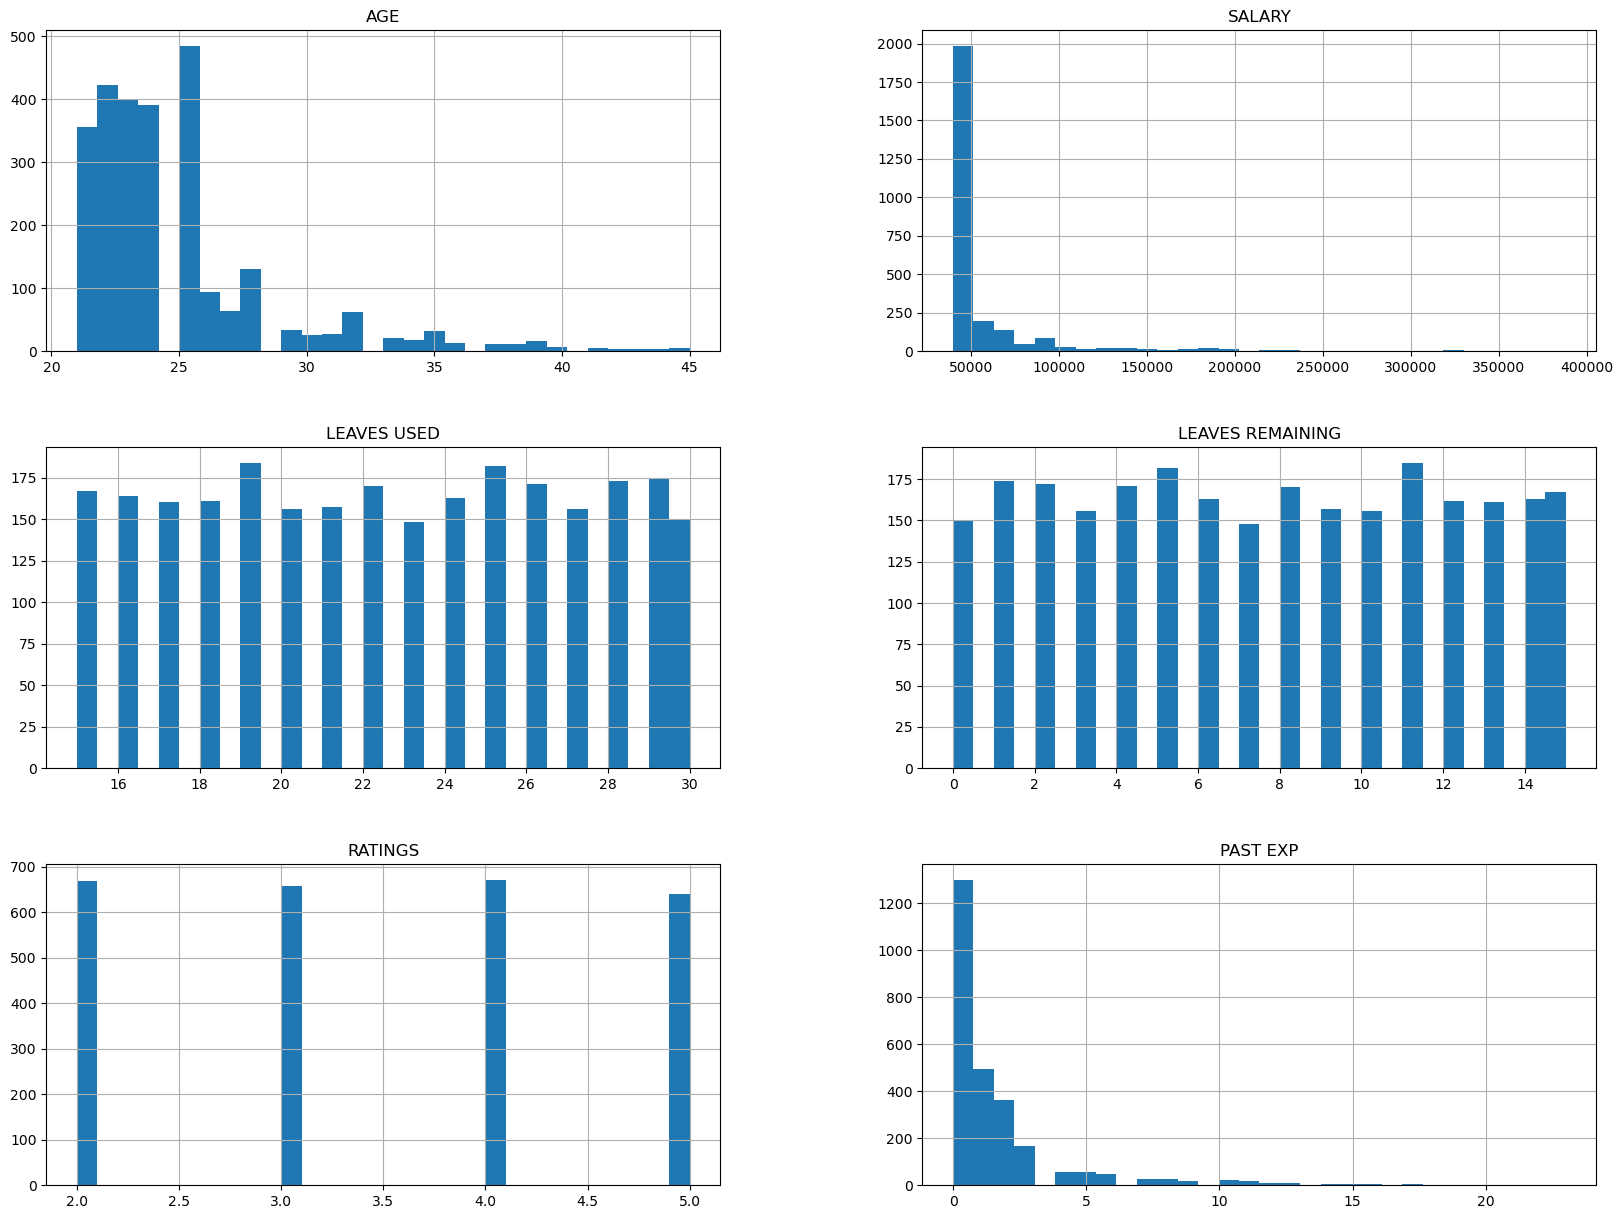

In [7]:


# Display histogram for all numerical features in the DataFrame
df.hist(figsize=(20,15), bins=30)
plt.show()

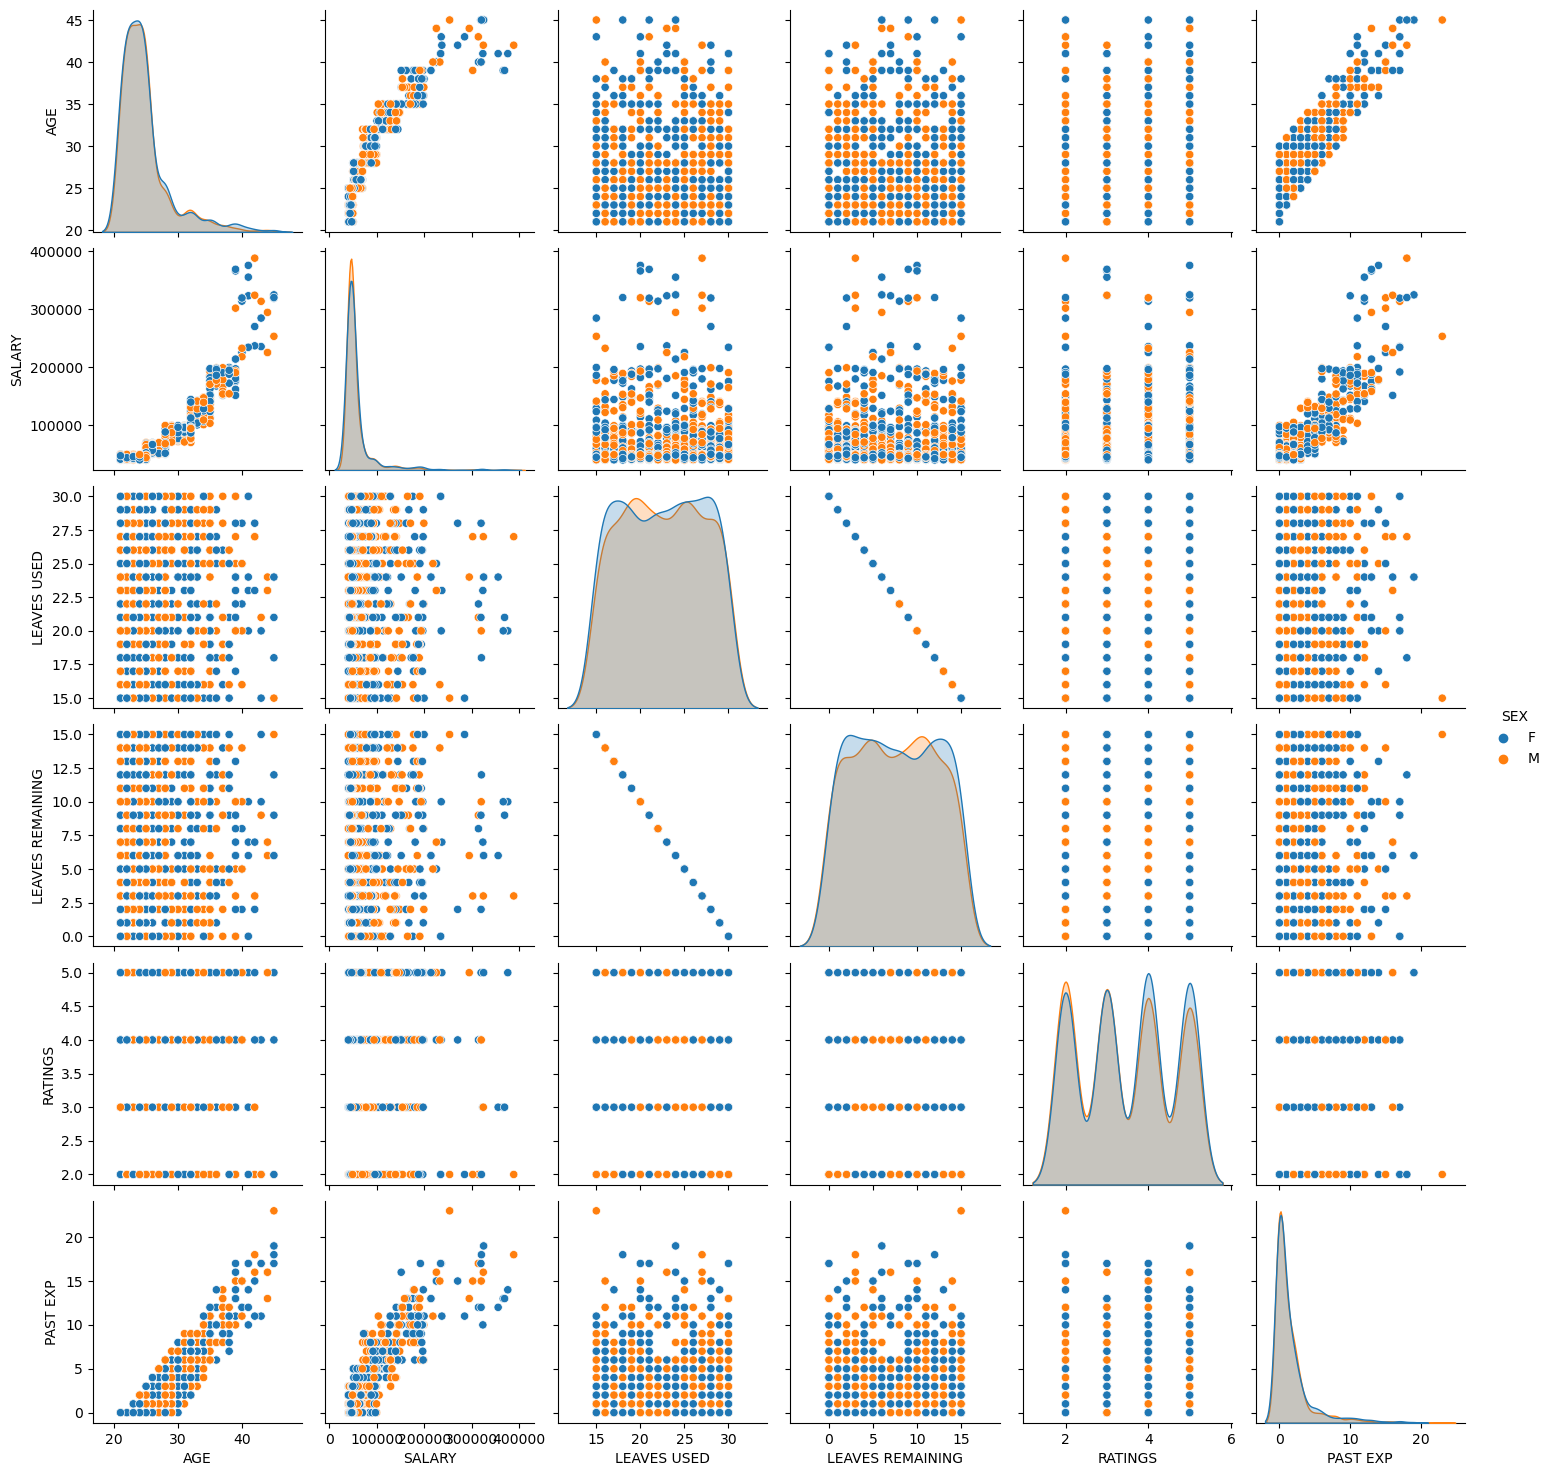

In [8]:



# Pairplot of numerical columns
sns.pairplot(df.dropna(), hue='SEX', diag_kind='kde')
plt.show()

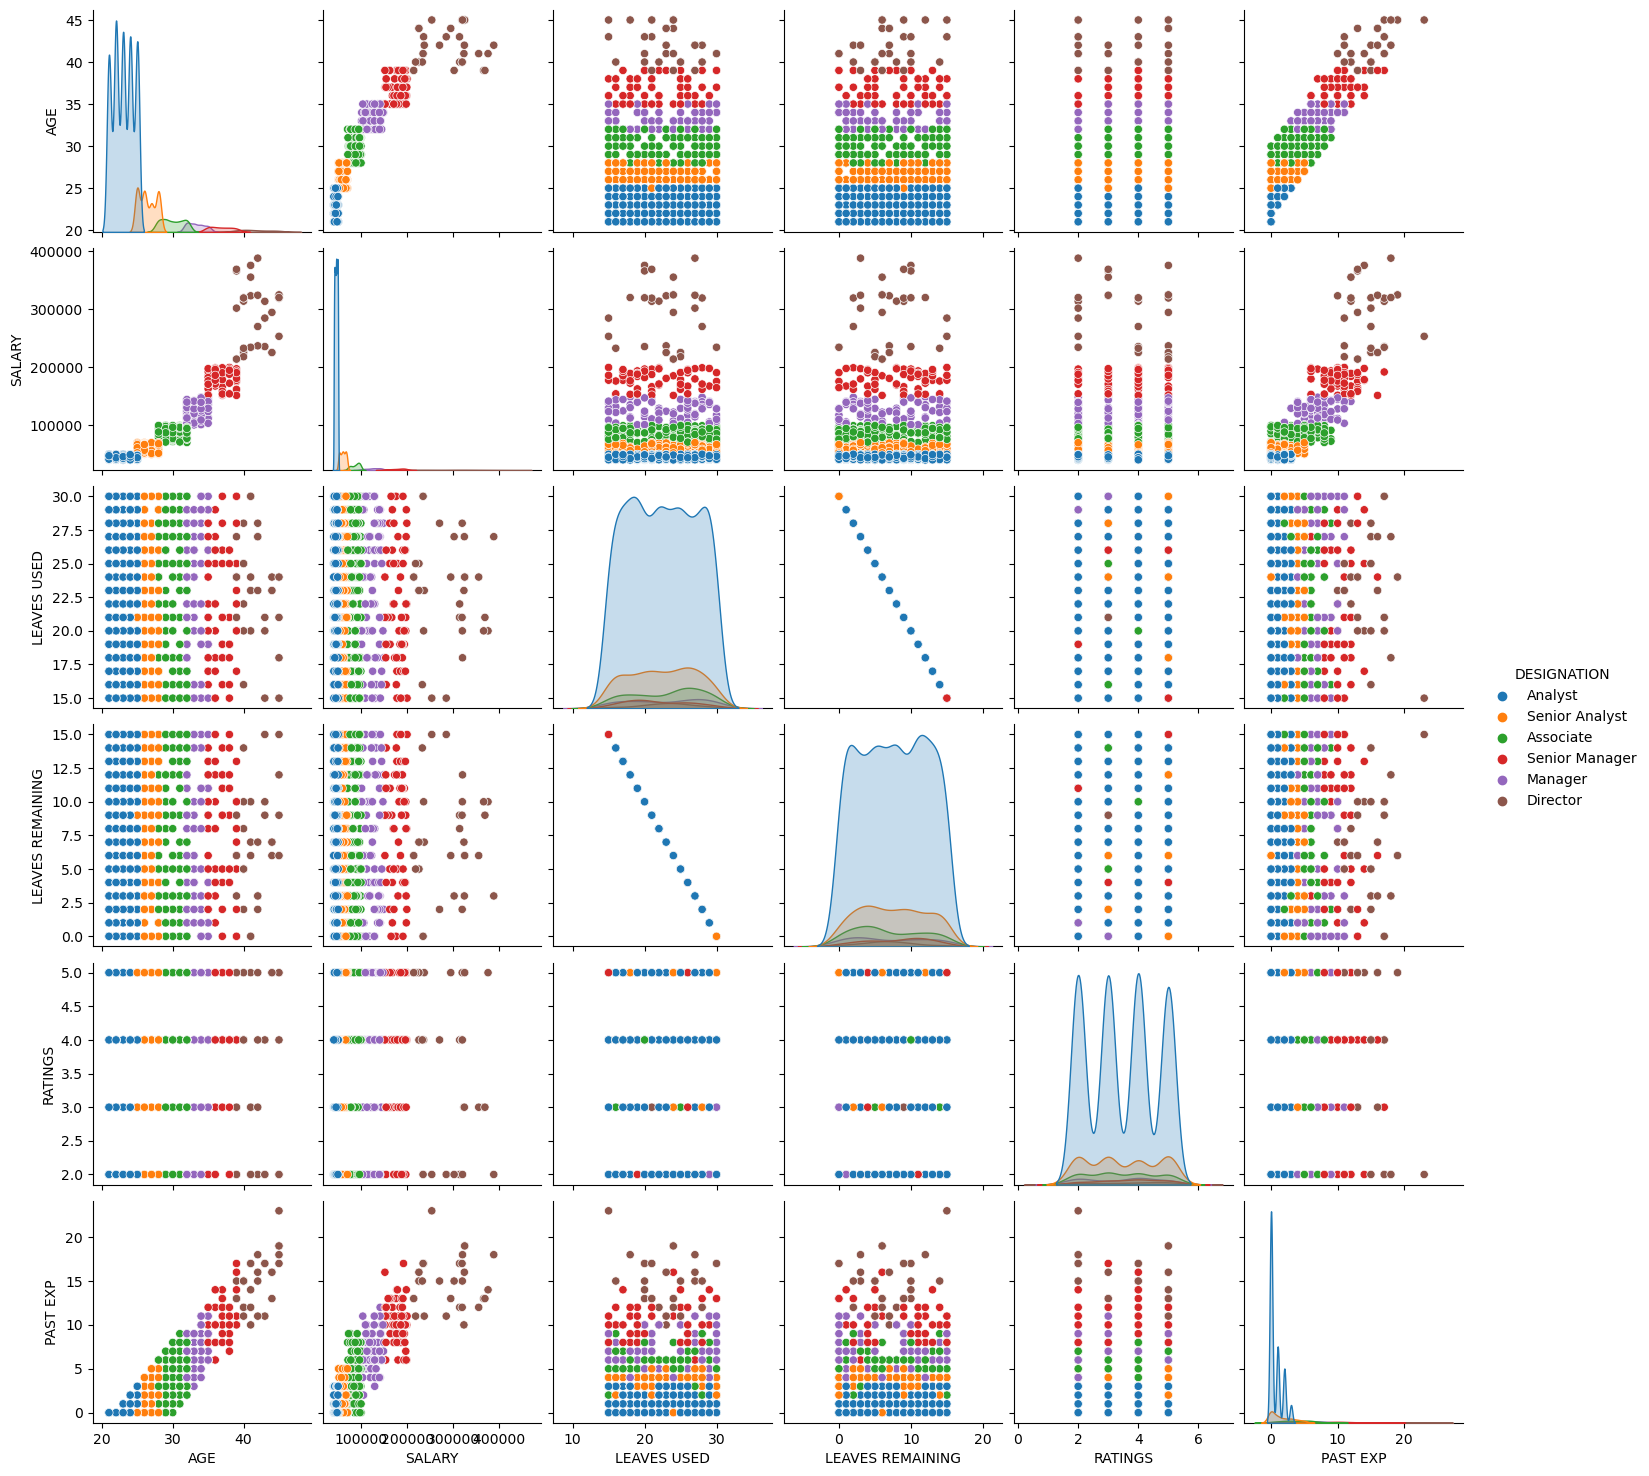

In [9]:


sns.pairplot(df.dropna(), hue='DESIGNATION', diag_kind='kde')
plt.show()

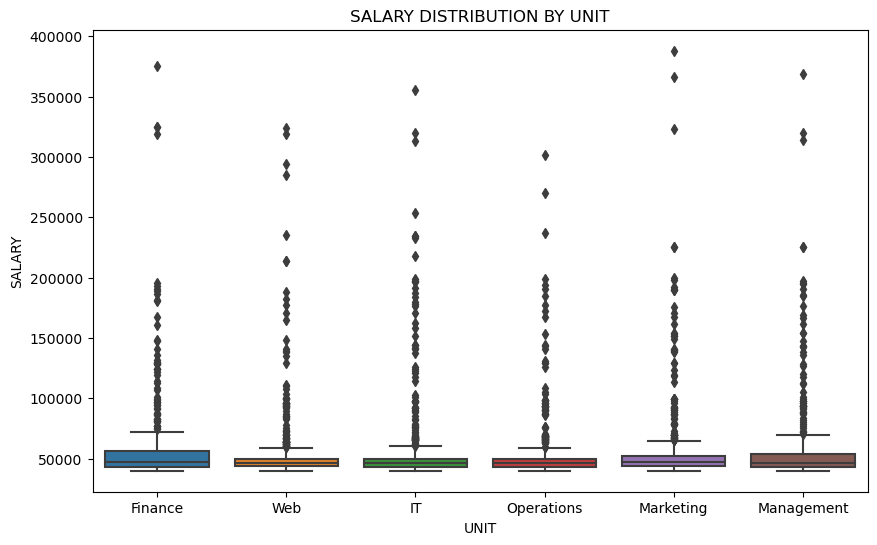

In [10]:


# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='UNIT', y='SALARY', data=df)
plt.title('SALARY DISTRIBUTION BY UNIT')
plt.xlabel('UNIT')
plt.ylabel('SALARY')
plt.show()

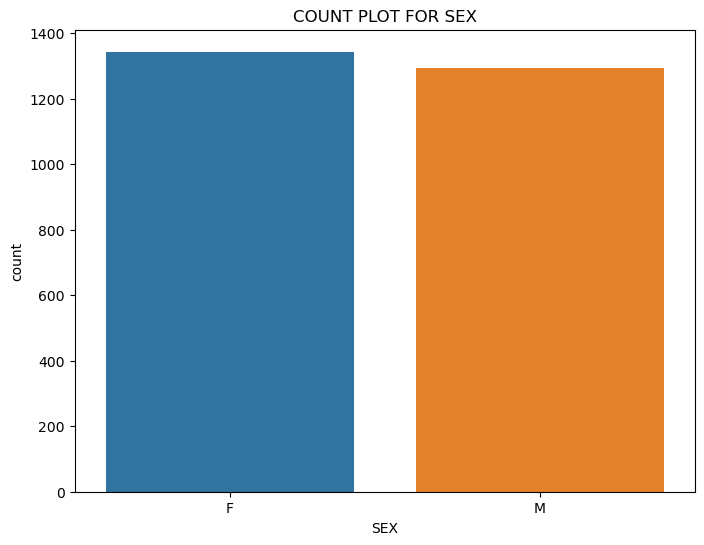

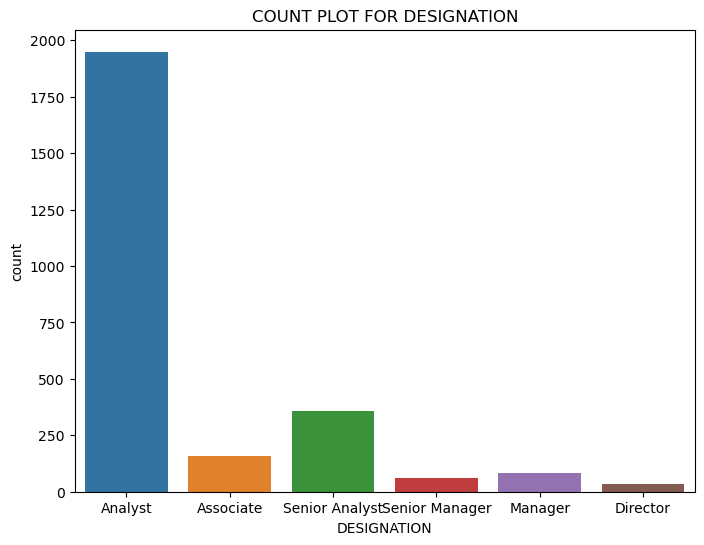

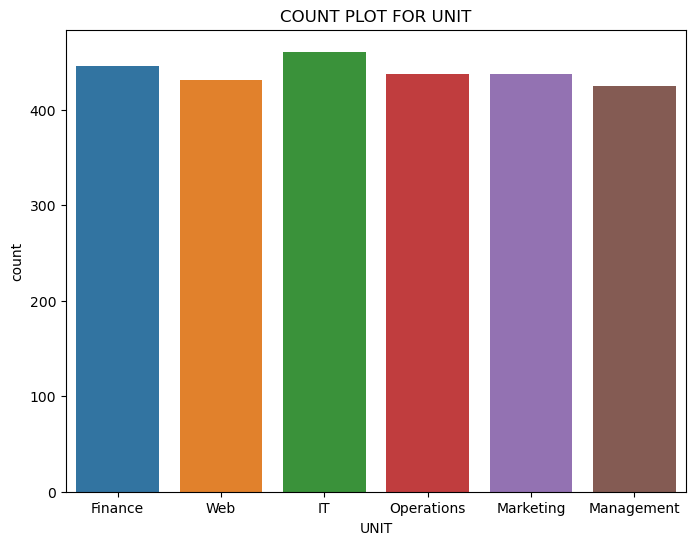

In [11]:


# Count plot for Categorical columns

categorical_columns = ['SEX', 'DESIGNATION', 'UNIT']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'COUNT PLOT FOR {column}')
    plt.show()

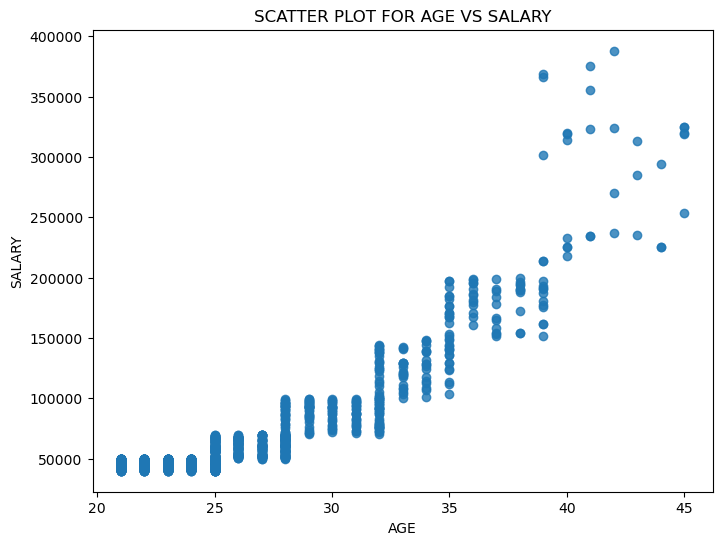

In [12]:


# Scatter Plot for AGE vs SALARY
plt.figure(figsize=(8, 6))
plt.scatter(df['AGE'], df['SALARY'], alpha=0.8)
plt.title('SCATTER PLOT FOR AGE VS SALARY')
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.show()

- Lower age group people have less salary while higher age group people have more salary as compared to lower age group.

**FEATURE ENGINEERING**

- Create new features or transform existing ones to provide additional insights or improve model performance.
- Extracted month and year from DOJ.
- Calculated Years of Experience (YOE).

In [13]:
# check duplicates
df.duplicated().sum()

161

In [14]:


df[df.duplicated(keep=False)]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
17,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
32,FOSTER,ALDERMAN,M,5-22-2014,01-07-2016,Senior Analyst,26.0,68295,Operations,28.0,2.0,5.0,3
36,HILLARY,ANTONIA,F,12-17-2014,01-07-2016,Analyst,23.0,45389,Management,27.0,3.0,2.0,1
38,ROSIE,AMILL,F,2-18-2013,01-07-2016,Analyst,24.0,49901,Web,24.0,6.0,4.0,0
47,GILDA,ARANCIBIA,F,5-22-2013,01-07-2016,Analyst,23.0,40264,Web,24.0,6.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,ROMEO,AINSLEY,M,11-20-2014,01-07-2016,Analyst,23.0,41052,IT,15.0,15.0,5.0,1
2591,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
2600,SHEREE,APPEL,F,9-24-2013,01-07-2016,Analyst,25.0,49559,Management,22.0,8.0,5.0,2
2624,JOSPEH,ALLIS,M,2-26-2014,01-07-2016,Analyst,22.0,45364,Web,20.0,10.0,2.0,0


In [15]:


# dropping duplicates
df.drop_duplicates(inplace=True)

In [16]:


# FIRST NAME and LAST NAME are not needed, so dropped
df.drop(['FIRST NAME', 'LAST NAME'], axis=1, inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:


df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [19]:

# Unique value presence
df.nunique()

SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2478 non-null   object 
 1   DOJ               2477 non-null   object 
 2   CURRENT DATE      2478 non-null   object 
 3   DESIGNATION       2478 non-null   object 
 4   AGE               2475 non-null   float64
 5   SALARY            2478 non-null   int64  
 6   UNIT              2478 non-null   object 
 7   LEAVES USED       2475 non-null   float64
 8   LEAVES REMAINING  2476 non-null   float64
 9   RATINGS           2476 non-null   float64
 10  PAST EXP          2478 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 232.3+ KB


In [21]:

# Change datatyoe of DOJ and CURRENT DATE to date_time format

df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], errors='coerce')

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEX               2478 non-null   object        
 1   DOJ               2477 non-null   datetime64[ns]
 2   CURRENT DATE      2478 non-null   datetime64[ns]
 3   DESIGNATION       2478 non-null   object        
 4   AGE               2475 non-null   float64       
 5   SALARY            2478 non-null   int64         
 6   UNIT              2478 non-null   object        
 7   LEAVES USED       2475 non-null   float64       
 8   LEAVES REMAINING  2476 non-null   float64       
 9   RATINGS           2476 non-null   float64       
 10  PAST EXP          2478 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 232.3+ KB


In [23]:

df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [24]:


# DOJ and CURRENT DATE can be merged into one features (YEARS OF EXPERIENCE as YOE)

df['YOE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days/365.25


In [25]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732


In [26]:

# Now remove the DOJ and CURRENT DATE columns

df.drop(['DOJ' ,'CURRENT DATE'], axis=1, inplace=True)

In [27]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732


In [28]:


# Checking for Null values
df.isnull().sum()

SEX                 0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
YOE                 1
dtype: int64

In [29]:


df['SUM LEAVES'] = df['LEAVES USED'] + df['LEAVES REMAINING']

In [30]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE,SUM LEAVES
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973,30.0
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585,30.0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491,30.0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732,30.0


In [31]:

df.nunique()

SEX                    2
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
YOE                  967
SUM LEAVES             1
dtype: int64

In [32]:

df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE,SUM LEAVES
count,2475.000000,2478.000000,2475.000000,2476.000000,2476.000000,2478.000000,2477.000000,2473.0
mean,24.727273,58076.235270,22.493737,7.511309,3.481826,1.560129,2.189427,30.0
std,3.912591,36786.661873,4.598805,4.597438,1.115942,2.706363,0.903499,0.0
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000,0.933607,30.0
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000,1.492129,30.0
50%,24.000000,46733.500000,22.000000,8.000000,3.000000,1.000000,2.083504,30.0
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000,2.674880,30.0
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,6.954141,30.0


In [33]:

df[df['LEAVES USED'].isnull()]

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE,SUM LEAVES
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
11,M,Senior Manager,36.0,160613,Finance,NaN,11.0,2.0,9,5.930185,NaN
19,M,Analyst,24.0,44665,Web,NaN,12.0,5.0,0,2.513347,NaN


In [34]:

df['LEAVES USED'].fillna(30 - df['LEAVES REMAINING'], inplace=True)

In [35]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE,SUM LEAVES
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973,30.0
1,F,Associate,NaN,89207,Web,17.0,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585,30.0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491,30.0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732,30.0


In [36]:


# Drop LEAVES REMAINING and SUM LEAVES column
df.drop(['LEAVES REMAINING', 'SUM LEAVES'], axis=1, inplace=True)

In [37]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YOE
0,F,Analyst,21.0,44570,Finance,24.0,2.0,0,1.639973
1,F,Associate,NaN,89207,Web,17.0,NaN,7,NaN
2,F,Analyst,21.0,40955,Finance,23.0,3.0,0,1.445585
3,F,Analyst,22.0,45550,IT,22.0,3.0,0,2.762491
4,M,Analyst,NaN,43161,Operations,27.0,NaN,3,1.130732


In [38]:


df.isnull().sum()

SEX            0
DESIGNATION    0
AGE            3
SALARY         0
UNIT           0
LEAVES USED    0
RATINGS        2
PAST EXP       0
YOE            1
dtype: int64

In [39]:


# check mean and median for AGE column
print(df['AGE'].mean())
print(df['AGE'].median())

24.727272727272727
24.0


In [40]:

# filling the Nan for AGE, YOE and RATINGS columns with median values
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].median(), inplace=True)
df['YOE'].fillna(df['YOE'].median(), inplace=True)

In [41]:

df.isnull().sum()

SEX            0
DESIGNATION    0
AGE            0
SALARY         0
UNIT           0
LEAVES USED    0
RATINGS        0
PAST EXP       0
YOE            0
dtype: int64

In [42]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YOE
0,F,Analyst,21.0,44570,Finance,24.0,2.0,0,1.639973
1,F,Associate,24.0,89207,Web,17.0,3.0,7,2.083504
2,F,Analyst,21.0,40955,Finance,23.0,3.0,0,1.445585
3,F,Analyst,22.0,45550,IT,22.0,3.0,0,2.762491
4,M,Analyst,24.0,43161,Operations,27.0,3.0,3,1.130732


**This will be our refined dataset on which we will Preprocess.**

**DATA PREPROCESSING**

- Drop irrelevant columns.
- Handle missing values.
- Encode Categorical variables.
- Scale or Normalize features as needed.

In [43]:
# Seperate dependent and independent variable
X = df.drop(['SALARY'], axis=1)
y = df['SALARY']

In [44]:

# ONE HOT ENCODING

df_encoded = pd.get_dummies(X, columns=['SEX', 'DESIGNATION', 'UNIT'])

In [45]:
df_encoded.head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,24.0,2.0,0,1.639973,True,False,True,False,False,False,False,False,True,False,False,False,False,False
1,24.0,17.0,3.0,7,2.083504,True,False,False,True,False,False,False,False,False,False,False,False,False,True
2,21.0,23.0,3.0,0,1.445585,True,False,True,False,False,False,False,False,True,False,False,False,False,False
3,22.0,22.0,3.0,0,2.762491,True,False,True,False,False,False,False,False,False,True,False,False,False,False
4,24.0,27.0,3.0,3,1.130732,False,True,True,False,False,False,False,False,False,False,False,False,True,False


In [46]:


df_encoded.astype(float)

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,24.0,2.0,0.0,1.639973,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,24.0,17.0,3.0,7.0,2.083504,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21.0,23.0,3.0,0.0,1.445585,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,22.0,22.0,3.0,0.0,2.762491,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,27.0,3.0,3.0,1.130732,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,36.0,15.0,5.0,10.0,4.528405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2635,23.0,17.0,2.0,0.0,1.979466,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2636,21.0,29.0,5.0,0.0,1.954825,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2637,24.0,23.0,3.0,1.0,1.809719,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:



# Standardization
from sklearn.preprocessing import StandardScaler

numerical_columns = ['AGE', 'LEAVES USED', 'RATINGS', 'PAST EXP', 'YOE']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standardization to numerical_columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

X = df_encoded.astype(float)
X

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.953160,0.328786,-1.328226,-0.576583,-0.608338,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185801,-1.193670,-0.431646,2.010436,-0.117236,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.953160,0.111292,-0.431646,-0.576583,-0.823573,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.697374,-0.106201,-0.431646,-0.576583,0.634574,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.185801,0.981267,-0.431646,0.532139,-1.172195,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2.883634,-1.628657,1.361513,3.119158,2.589886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2635,-0.441587,-1.193670,-1.328226,-0.576583,-0.232433,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2636,-0.953160,1.416254,1.361513,-0.576583,-0.259716,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2637,-0.185801,0.111292,-0.431646,-0.207009,-0.420385,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

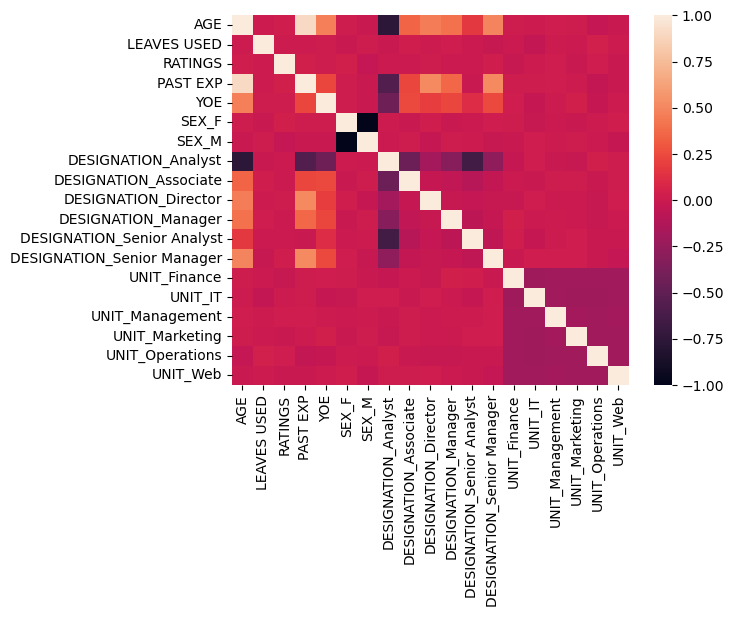

In [48]:




# HeatMap
sns.heatmap(X.corr())

**Here we can see some highly correlated values, but check the results by keeping and removing the highly correlated values.**

In [49]:
X.head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.953160,0.328786,-1.328226,-0.576583,-0.608338,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185801,-1.193670,-0.431646,2.010436,-0.117236,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.953160,0.111292,-0.431646,-0.576583,-0.823573,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.697374,-0.106201,-0.431646,-0.576583,0.634574,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.185801,0.981267,-0.431646,0.532139,-1.172195,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
y.head()

0    44570
1    89207
2    40955
3    45550
4    43161
Name: SALARY, dtype: int64

In [51]:



# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

**MACHINE LEARNING MODEL**

- Train various machine learning regression models to predict salaries.
- Experiment with different algorithms such as linear Regression, Decision TBoosting to identify the best
performing model.
- Evaluated model performance using R² scores

In [53]:
# Define the models to be used for regression

models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor()
}

In [57]:
# Train and evaluate each model

for name, model in models.items():
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    print(f'{name} -> Training R^2 score = {train_r2}')
    print(f'{name} -> Test R^2 score = {test_r2}')

Linear Regression -> Training R^2 score = 0.9558405055300109
Linear Regression -> Test R^2 score = -1.156270288344476e+26
Decision Tree -> Training R^2 score = 0.9999984515584086
Decision Tree -> Test R^2 score = 0.6834971629172781
Random Forest -> Training R^2 score = 0.9921157974027149
Random Forest -> Test R^2 score = 0.8317635326859347
Gradient Boosting -> Training R^2 score = 0.9833180427918243
Gradient Boosting -> Test R^2 score = 0.8249310275330762


**Random Forest performed the best with the highest R^2 score, indicating it captured the variance in salary well.**

**MODEL EVALUATION**

- Assess the performance of the models using appropriate evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) score.
- Identify the model that provides the most accurate salary predictions.
- Selected Random Forest as the best model
- Visualization of predicted vs actual salaries



In [58]:
# Evaluate the best model (replace best_model with the actual model from above)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [62]:


# Calculate Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R^2 Score = {r2}')

Mean Absolute Error = 6587.514821908602
Mean Squared Error = 142324953.61317477
Root Mean Squared Error = 11930.00224698951
R^2 Score = 0.8337485011713273


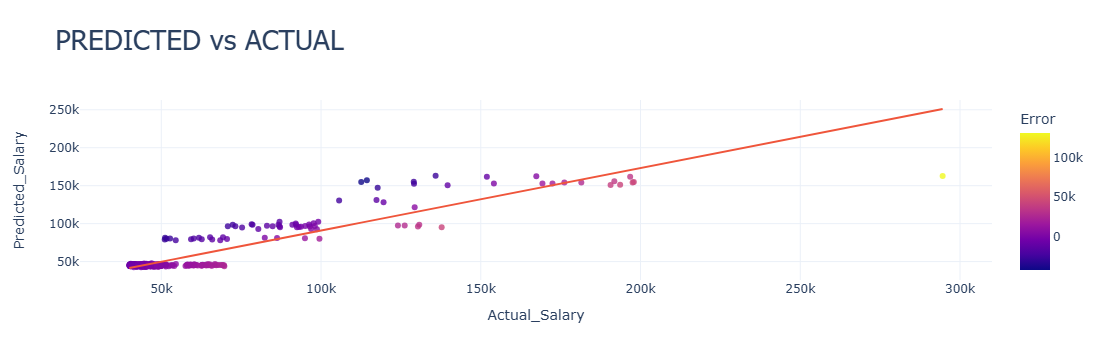

In [67]:

import plotly.express as px

# Create a DataFrame for Plotly
predicted_data = pd.DataFrame({
    'Actual_Salary' : y_test,
    'Predicted_Salary' : y_pred,
    'Error' : y_test - y_pred
})

# Plot using Plotly Express
fig = px.scatter(predicted_data, x='Actual_Salary', y='Predicted_Salary', color='Error',
                 opacity=0.8,
                 title= 'PREDICTED vs ACTUAL',
                 template= 'plotly_white',
                 trendline='ols'
)

fig.update_layout(
    title={
        'font' : {
            'size' : 28,
            'family' : 'tahoma'
        }
    }
)

fig.show()
    

**Points close to the line of perfect prediction (where Actual Salary = Predicted Salary) indicate high model accuracy.**

**Error Distribution: Coloring points by prediction error helps identify overestimation or underestimation. Identifying specific areas where the model perform poorly can guide further model improvement.**

**ML PIPELINES**

- Create ML Pipelines to streamline the end-to-end machine learning process, from data preprocessing to model training.
-  Deploy a model that can generate predictions for unseen data.
-  Evaluated the pipeline performance.

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [81]:

# Create a pipeline for preprocessing and modelling
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop('SALARY', axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())

])

In [83]:



# Split the data
X = df.drop('SALARY', axis=1)
y = df['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:


# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['AGE', 'LEAVES USED', 'RATINGS', 'PAST EXP', 'YOE'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['SEX', 'DESIGNATION', 'UNIT'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [85]:


# Evaluate the pipeline
train_r2 = pipeline.score(X_train, y_train)
test_r2 = pipeline.score(X_test, y_test)

print(f'Pipeline -> Training R^2 score = {train_r2}')
print(f'Pipeline -> Test R^2 score = {test_r2}')

Pipeline -> Training R^2 score = 0.9930664915268349
Pipeline -> Test R^2 score = 0.9563781896111267


**RECOMMENDATIONS**

 - Experience : More years of experience generally lead to higher salaries.
 - Years of Experience : Longer tenure within a company can also positively impact salary.